In [1]:
import itk
import matplotlib.pyplot as plt
import numpy as np

# Read input image
input_image = itk.imread("Brain_CT.jpg", itk.F)

# Print input image size, spacing, origin, and direction
print("Input image size: ", input_image.GetLargestPossibleRegion().GetSize())
print("Input image spacing: ", input_image.GetSpacing())
print("Input image origin: ", input_image.GetOrigin())
print("Input image direction: ", input_image.GetDirection())


# Create the resample filter
resample_filter = itk.ResampleImageFilter.New(Input=input_image)

# Set the transform to identity by default
identity_transform = itk.IdentityTransform[itk.D, 2].New()
resample_filter.SetTransform(identity_transform)

# Set the interpolator to nearest neighbor
interpolator = itk.NearestNeighborInterpolateImageFunction.New(input_image)
resample_filter.SetInterpolator(interpolator)

# Set output parameters using GetSpacing, GetOrigin, and GetDirection
resample_filter.SetOutputSpacing(input_image.GetSpacing())
resample_filter.SetOutputOrigin(input_image.GetOrigin())
resample_filter.SetOutputDirection(input_image.GetDirection())

# Set the desired size
output_size = [1000, 1000]
resample_filter.SetSize(output_size)

#print output image size, spacing, origin, and direction
print("")
print("Output image size: ", resample_filter.GetSize())
print("Output image spacing: ", resample_filter.GetOutputSpacing())
print("Output image origin: ", resample_filter.GetOutputOrigin())
print("Output image direction: ", resample_filter.GetOutputDirection())

y_ax = max(input_image.GetLargestPossibleRegion().GetSize()[1], output_size[1]) + 1
x_ax = max(input_image.GetLargestPossibleRegion().GetSize()[0], output_size[0]) + 1




Input image size:  itkSize2 ([630, 630])
Input image spacing:  itkVectorD2 ([0.352778, 0.352778])
Input image origin:  itkPointD2 ([0, 0])
Input image direction:  itkMatrixD22 ([[1.0, 0.0], [0.0, 1.0]])

Output image size:  itkSize2 ([1000, 1000])
Output image spacing:  itkVectorD2 ([0.352778, 0.352778])
Output image origin:  itkPointD2 ([0, 0])
Output image direction:  itkMatrixD22 ([[1.0, 0.0], [0.0, 1.0]])


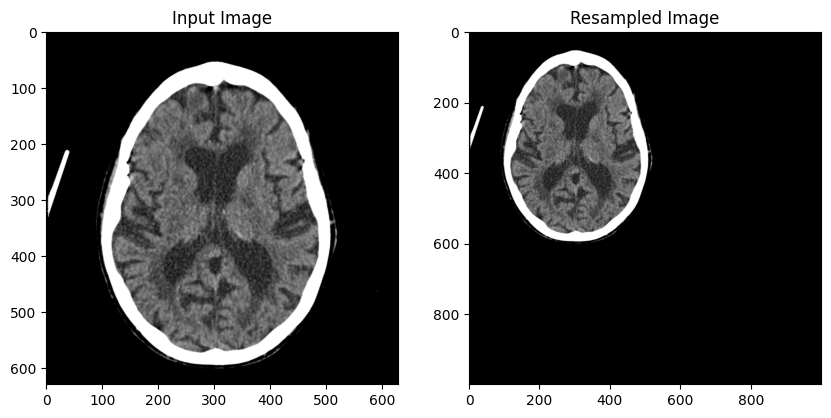

In [2]:


# Set default pixel value
resample_filter.SetDefaultPixelValue(0)

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "ResampleImageFilterOutput1.png")

# Show the input and output images in 1000*1000 grid
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.axis('on')
plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Resampled Image')
plt.axis('on')
plt.show()




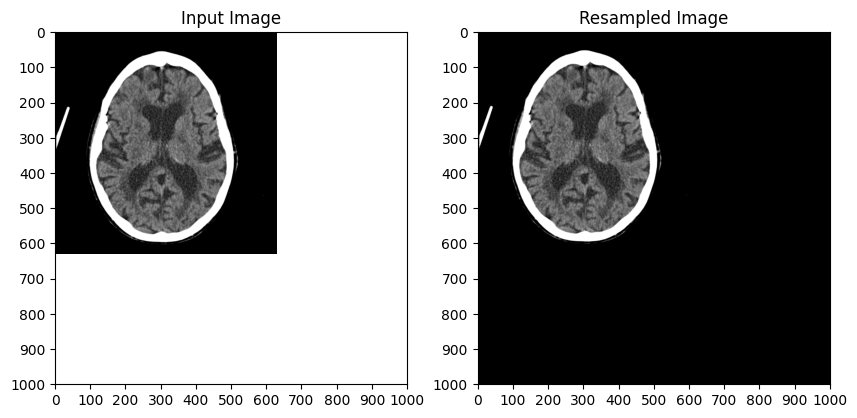

'\n#Save plotted input image and output image with 1000*1000 grid\nplt.figure(figsize=(5, 5))\nplt.imshow(itk.array_from_image(input_image), cmap=\'gray\')\nplt.title(\'\')\nplt.xticks(np.arange(0, x_ax, 100))\nplt.yticks(np.arange(0, y_ax, 100))\nplt.axis(\'on\')\nplt.savefig("Input_Image_new.png")\n\nplt.figure(figsize=(5, 5))\nplt.imshow(itk.array_from_image(output_image), cmap=\'gray\')\nplt.title(\'\')\nplt.xticks(np.arange(0, x_ax, 100))\nplt.yticks(np.arange(0, y_ax, 100))\nplt.axis(\'on\')\nplt.savefig("Output_Image_new.png") '

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')


plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Resampled Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()

'''
#Save plotted input image and output image with 1000*1000 grid
plt.figure(figsize=(5, 5))
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')
plt.savefig("Input_Image_new.png")

plt.figure(figsize=(5, 5))
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')
plt.savefig("Output_Image_new.png") '''



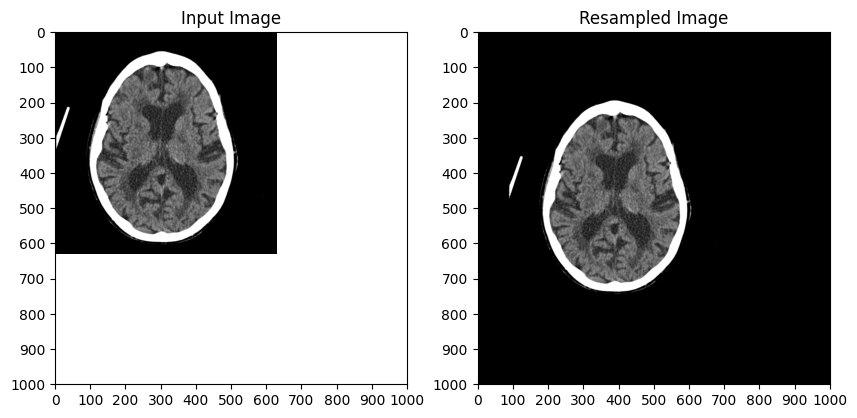

'\nplt.figure(figsize=(5, 5))\nplt.imshow(itk.array_from_image(output_image), cmap=\'gray\')\nplt.title(\'\')\nplt.xticks(np.arange(0, x_ax, 100))\nplt.yticks(np.arange(0, y_ax, 100))\nplt.axis(\'on\')\nplt.savefig("Out_Image_new_1.png")\n'

In [4]:


# Perform translation
translation = [-30.0, -50.0]
translation_transform = itk.TranslationTransform[itk.D, 2].New()
translation_transform.Translate(translation)
resample_filter.SetTransform(translation_transform)
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "ResampleImageFilterOutput2.png")

# Show the input and output images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Resampled Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()

'''
plt.figure(figsize=(5, 5))
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')
plt.savefig("Out_Image_new_1.png")
'''


In [5]:
# Calculate amout of translation in pixel units
translation_in_pixels = translation_transform.GetOffset()
print("Translation in physical units: ", translation)

# Spacing is the physical size of a pixel
print("Spacing: ", np.array(input_image.GetSpacing()))

translation_in_pixels = np.array(translation_in_pixels) / np.array(input_image.GetSpacing())

# Translation in pixels is the translation in physical units divided by the spacing
print("Translation in pixels: = -30.0/0.35277778, -50.0/0.35277778")

translation_in_pixels = np.round(translation_in_pixels).astype(int)
print("Translation in pixels (rounded): ", translation_in_pixels)


Translation in physical units:  [-30.0, -50.0]
Spacing:  [0.35277778 0.35277778]
Translation in pixels: = -30.0/0.35277778, -50.0/0.35277778
Translation in pixels (rounded):  [ -85 -142]


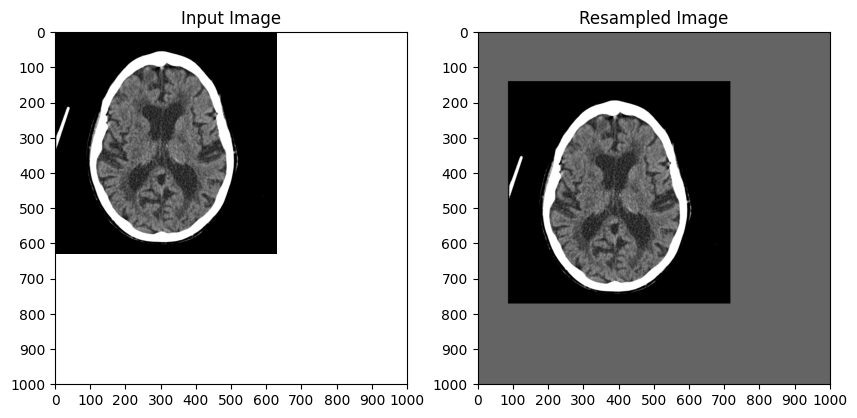

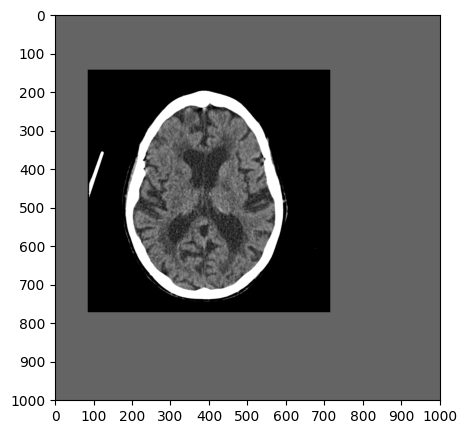

In [6]:


# Highlight borders with a default pixel value of 100
resample_filter.SetDefaultPixelValue(100)
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "ResampleImageFilterOutput3.png")

# Show the input and output images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Resampled Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')
plt.savefig("Out_Image_new_2.png")